<center><h1>Mining Twitter Data Using Python / Tweepy</h1></center>

## Main script that parses the stream of tweets based on a filter word

In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "your_access_token"
access_token_secret = "your_access_secret_token"
consumer_key = "your_consumer_key"
consumer_secret = "your_consumer_secret"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'honda'
    stream.filter(track=['honda'])

### Then from your terminal, execute this script with output piped to a text file: your_script.py > tweets_data.txt

## Then run this script below to create a Python dataframe of the tweets data text file

In [ ]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from os import path
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",20)
pd.set_option("display.max_colwidth",150)

d = path.dirname('/home/pybokeh/temp/')
#text = open(path.join(d, 'twitter_data.txt')).read()

tweets_data = []
tweets_file = open(path.join(d, 'honda_heritage.txt'),'r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        if len(tweet) > 10:            # Ensure json data is complete
            tweets_data.append(tweet)
    except:
        continue

print(len(tweets_data))

### Create pandas dataframe

In [2]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'].lower() for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['sample']      = [tweet['text'][:20] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]

### You may be wondering why did I create a "sample" column?  The reason being, it will be used to determine if a tweet is a duplicate to another tweet.  Basically, my logic is, if the first 20 characters are the same between tweets, then I am assuming they are the exact same.  Whether or not this is a good logic to use, I dont' know, but seems to be the easiest way I can think of.

### Let's remove redundant tweets, retweets, duplicates, and limit to English tweets

In [3]:
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False)]

In [4]:
english_tweets = english_tweets.drop_duplicates(subset='sample');

In [5]:
text = ''
for line in english_tweets['text']:
    text = text + ' ' + line.replace("'s", " ")  # Replace 's with a space since I don't care about the possessive form
                                                 # of the noun

## Now create the word cloud

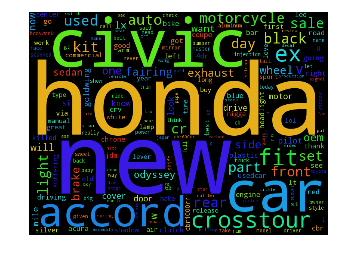

In [6]:
%matplotlib inline
from os import path
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')

additional_words = [
    'rt',
    'ebay',
    't',
    'https',
    'co',
    't',
    'amp',
    's',
    'tcot',
    'de'
]

for word in additional_words:
    STOPWORDS.add(word)

wc = WordCloud(width=800, height=600).generate(text)

# store to file
wc.to_file(path.join(d, "civic.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.gca().xaxis.set_major_locator(NullLocator())   # remove white space
plt.gca().yaxis.set_major_locator(NullLocator())   # remove white space
plt.show()

### What caught my eye was that "crosstour" was the 6th most mentioned word, which is interesting since quite frankly, the Crosstour is not a very popular Honda model.

In [8]:
wc.process_text(text)[:10]

[('honda', 1.0),
 ('new', 0.15517241379310345),
 ('civic', 0.1532567049808429),
 ('car', 0.0772669220945083),
 ('accord', 0.07471264367816093),
 ('crosstour', 0.0561941251596424),
 ('fit', 0.05108556832694764),
 ('ex', 0.037037037037037035),
 ('motorcycle', 0.03384418901660281),
 ('used', 0.032567049808429116)]

### So...let's see what the hoopla is about with the Honda Crosstour. <br><br>Let's limit our data to just tweets containing "crosstour".

In [13]:
tweets = pd.DataFrame()
tweets['text']      = [tweet['text'].lower() for tweet in tweets_data]
tweets['lang']      = [tweet['lang'] for tweet in tweets_data]
tweets['sample']      = [tweet['text'][:20] for tweet in tweets_data]
tweets['retweeted'] = [tweet['retweeted'] for tweet in tweets_data]
english_tweets = tweets[(tweets['lang']=='en') & (tweets['retweeted']==False)]
english_tweets = english_tweets.drop_duplicates(subset='sample')
english_tweets = english_tweets[english_tweets['text'].str.contains('crosstour')]

### Ouch...it turns out Honda is ending production of the Crosstour.  Now it makes sense why Crosstour was getting a lot of tweets.  Bye bye Crosstour, it was nice knowing ya.

In [16]:
english_tweets.head(20)

text  \
19                                    it's official: honda kills crosstour as new suvs take over http://t.co/mcym7t1onq http://t.co/5rybfblfkl   
24                                                                  honda killing off crosstour in big production shift http://t.co/frjmtz22of   
60                                                bad news everyone. the honda crosstour is dead http://t.co/fyg4r70hhe http://t.co/gge5pkimk7   
61                                                           end of the road for honda crosstour http://t.co/6dokzagnh1 http://t.co/vojtnxqgdj   
99                                  rt @jalopnik: bad news everyone. the honda crosstour is dead http://t.co/fyg4r70hhe http://t.co/gge5pkimk7   
156   dtn autos: honda to drop crosstour, move accord hybrid output to japan: honda will stop producing the crosstou... http://t.co/oxogaj44tv   
203                         ну такое "@jalopnik: bad news everyone. the honda crosstour is dead http://t.co/jam0xnttij http://t.co/peeturoqba"   
297            honda to drop crosstour, move accord hybrid output to japan: honda will stop producing the crosstour, a… http://t.co/wmnb3welc7   
329  #rt honda killing off crosstour in big production shift: the hatchback never caught on with consumers\n... http://t.co/ui63andlwn #follow   
394   dead: honda crosstour: the honda crosstour , one of the homeliest vehicles on the road and a sad sub... http://t.co/a5eybhf5xd #automcza   
447                                                                                      the honda crosstour is no more http://t.co/ccjqca0vtg   
458                                                                                  ab: the honda crosstour is no more http://t.co/adrqzhuicg   
483                                     rt @autofile_canada: end of the road for honda crosstour http://t.co/y08swddwha http://t.co/2ohwbn0gm5   
513                                         http://t.co/1cfinyumgx  : the honda crosstour is no more http://t.co/fjmh1x6wax thanks to autoblog   
537   long-suffering honda crosstour given sweet release, killed for 2016: -first, the practical but dorky mercedes ... http://t.co/pkc02fgjak   
558                                        c&amp;d: long-suffering honda crosstour given sweet release, killed for 2016 http://t.co/bde4vu9nna   
563   #automotivenews : long-suffering honda crosstour given sweet release, killed for 2016: -first, the practical b... http://t.co/imgpfmcmdv   
565  #carsautos long-suffering honda crosstour given sweet release, killed for 2016: -first, the practical but dork...  http://t.co/76lutscngx   
594              honda crosstour axed:  honda crosstour axedhonda has announced that the crosstour is being axed.  more http://t.co/0mpiuo3mcs   
629                                                                           autoblog: the honda crosstour is no more. http://t.co/hooceipr7u   

    lang                sample retweeted  
19    en  It's Official: Honda     False  
24    en  Honda killing off Cr     False  
60    en  Bad news everyone. T     False  
61    en  End of the road for      False  
99    en  RT @Jalopnik: Bad ne     False  
156   en  DTN Autos: Honda to      False  
203   en  Ну такое "@Jalopnik:     False  
297   en  Honda to drop Crosst     False  
329   en  #rt Honda killing of     False  
394   en  Dead: Honda Crosstou     False  
447   en  The Honda Crosstour      False  
458   en  AB: The Honda Crosst     False  
483   en  RT @Autofile_Canada:     False  
513   en  http://t.co/1CFiNYum     False  
537   en  Long-Suffering Honda     False  
558   en  C&amp;D: Long-Suffer     False  
563   en  #AutomotiveNews : Lo     False  
565   en  #carsautos Long-Suff     False  
594   en  Honda Crosstour Axed     False  
629   en  Autoblog: The Honda      False

### Let's make a word cloud related to just the Honda Crosstour

In [14]:
text = ''
for line in english_tweets['text']:
    text = text + ' ' + line.replace("'s", " ")

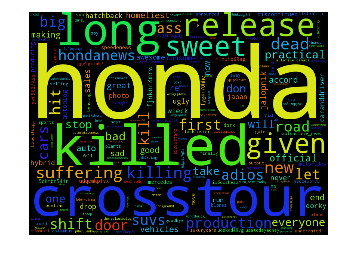

In [15]:
%matplotlib inline
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
d = path.dirname('/home/pybokeh/Downloads/')
# Read the whole text.
#text = strWords
#text = open(path.join(d, 'alice.txt')).read()

additional_words = [
    'rt',
    'ebay',
    't',
    'https',
    'co',
    't',
    'amp',
    's',
    'tcot',
    'de'
]

for word in additional_words:
    STOPWORDS.add(word)

wc = WordCloud(width=800, height=600).generate(text)

# store to file
wc.to_file(path.join(d, "crosstour.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.gca().xaxis.set_major_locator(NullLocator())   # remove white space
plt.gca().yaxis.set_major_locator(NullLocator())   # remove white space
plt.show()

### No surprise that "killed" is one of the most tweeted word as it relates to the Honda Crosstour considering what was just announced.

### So this ends my simple example on how to mine Twitter data using Python and the Tweepy package.